In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn import tree
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE


In [4]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [5]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
data.shape

(205, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
#converting int columns to float
data_con=data.copy()
index=["car_ID","symboling","curbweight","enginesize","horsepower","peakrpm","citympg","highwaympg"]
for i in index:
    data_con[i] = data_con[i].astype(float)

In [9]:
data_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    float64
 1

In [10]:
data_con.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
#checking if there are any missing values
data_con.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot: xlabel='Car Price ($)', ylabel='Count'>

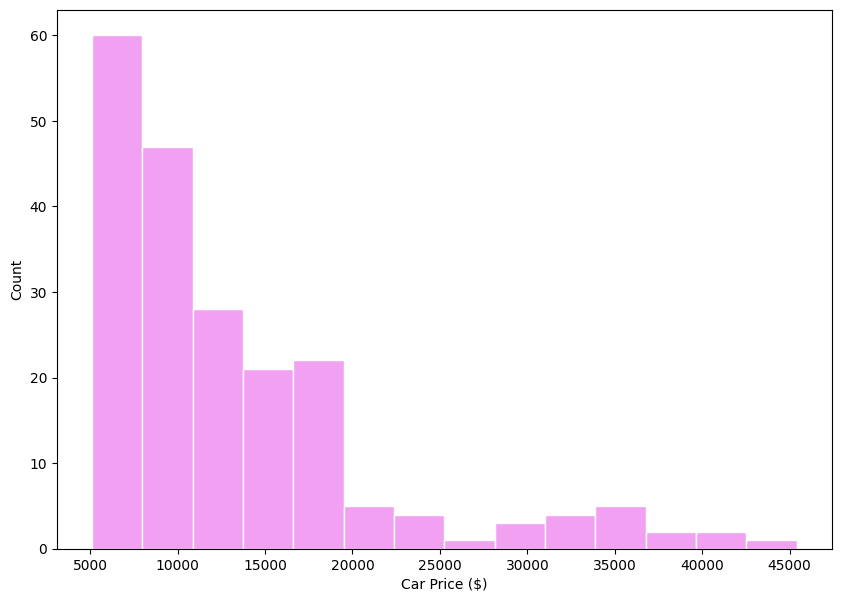

In [12]:
plt.figure(figsize=(10,7))
plt.xlabel("Car Price ($)")
sns.histplot(data_con.price,color="violet",edgecolor="white")

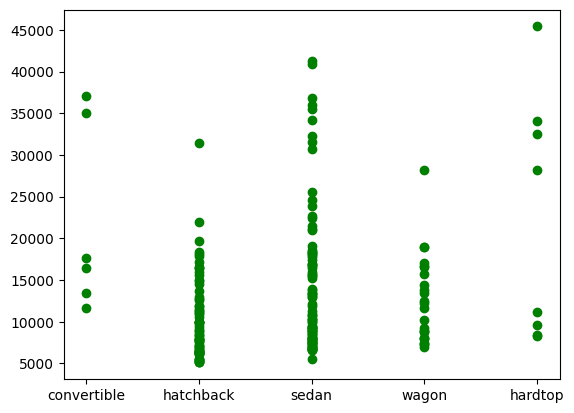

In [80]:
plt.scatter(data_con["carbody"], data_con["price"], c="green")

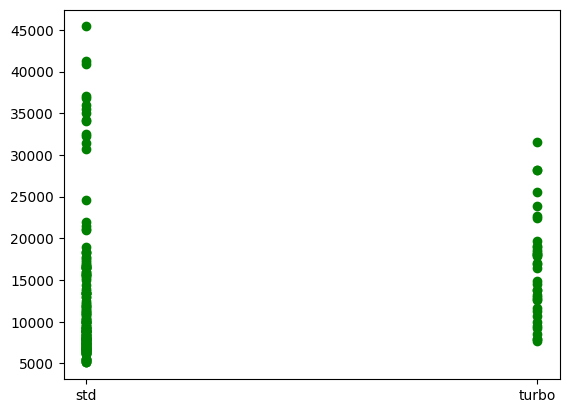

In [82]:
plt.scatter(data_con["aspiration"], data_con["price"], c="green")

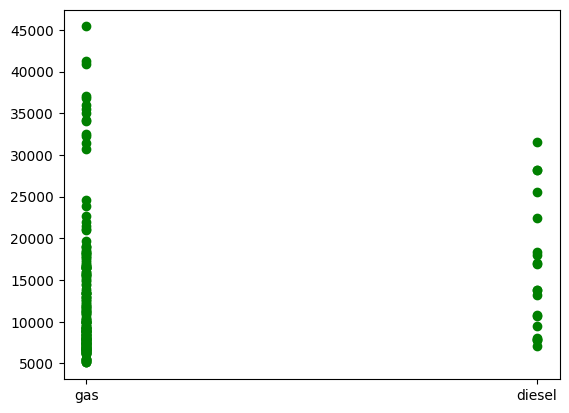

In [83]:
plt.scatter(data_con["fueltype"], data_con["price"], c="green")

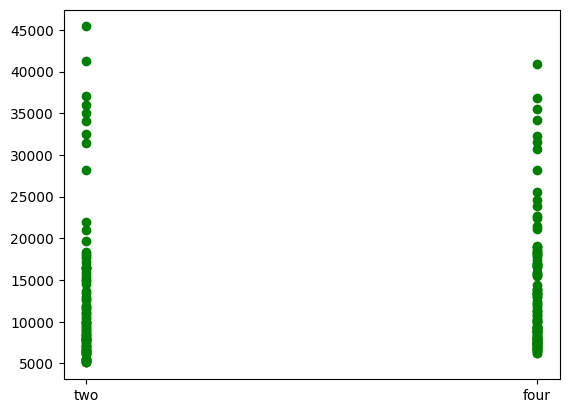

In [84]:
plt.scatter(data_con["doornumber"], data_con["price"], c="green")

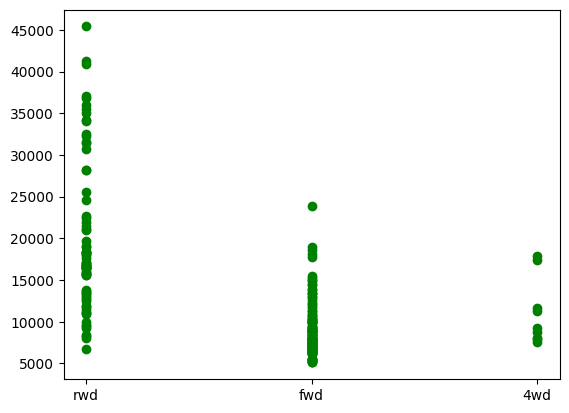

In [85]:
plt.scatter(data_con["drivewheel"], data_con["price"], c="green")

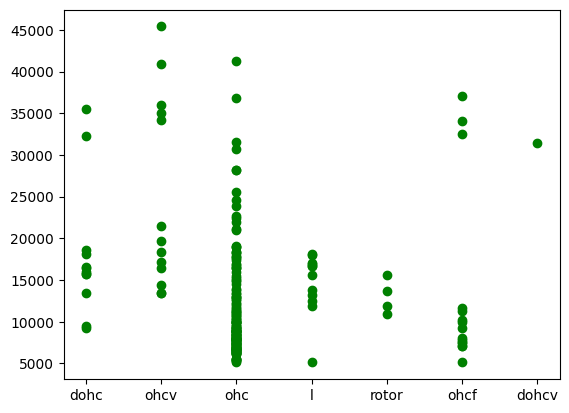

In [86]:
plt.scatter(data_con["enginetype"], data_con["price"], c="green")

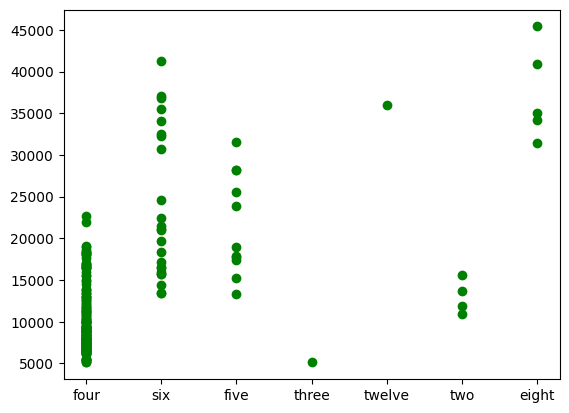

In [87]:
plt.scatter(data_con["cylindernumber"], data_con["price"], c="green")

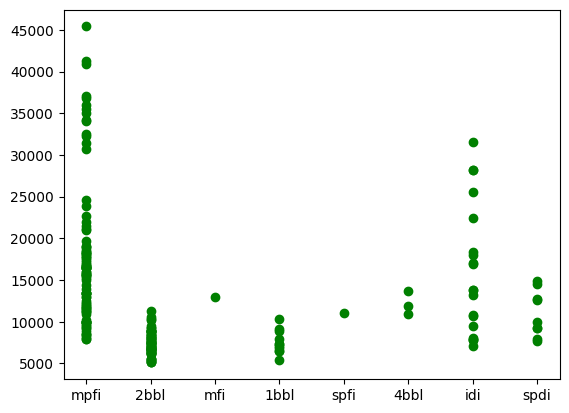

In [88]:
plt.scatter(data_con["fuelsystem"], data_con["price"], c="green")

In [13]:
# finding all non-numerical columns
data_num = data_con.copy()
for column in data_con.columns:
    if type(data_con[column][0])!=np.float64:
        print(column, type(data_con[column][0]), "Drop")
        data_num.drop(column, axis=1, inplace=True)
    else:
        print(column, type(data_con[column][0]), "Keep")

car_ID <class 'numpy.float64'> Keep
symboling <class 'numpy.float64'> Keep
CarName <class 'str'> Drop
fueltype <class 'str'> Drop
aspiration <class 'str'> Drop
doornumber <class 'str'> Drop
carbody <class 'str'> Drop
drivewheel <class 'str'> Drop
enginelocation <class 'str'> Drop
wheelbase <class 'numpy.float64'> Keep
carlength <class 'numpy.float64'> Keep
carwidth <class 'numpy.float64'> Keep
carheight <class 'numpy.float64'> Keep
curbweight <class 'numpy.float64'> Keep
enginetype <class 'str'> Drop
cylindernumber <class 'str'> Drop
enginesize <class 'numpy.float64'> Keep
fuelsystem <class 'str'> Drop
boreratio <class 'numpy.float64'> Keep
stroke <class 'numpy.float64'> Keep
compressionratio <class 'numpy.float64'> Keep
horsepower <class 'numpy.float64'> Keep
peakrpm <class 'numpy.float64'> Keep
citympg <class 'numpy.float64'> Keep
highwaympg <class 'numpy.float64'> Keep
price <class 'numpy.float64'> Keep


In [14]:
data_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.0,-1.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202.0,-1.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203.0,-1.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204.0,-1.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [15]:
X=data_num.drop(["price"],axis=1).copy()
y=data_num["price"]

In [16]:
# we are using 70% data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 0)

In [17]:
def rmse(yh,y):
    return np.sqrt(np.mean((yh-y)**2))

In [18]:
#Ordinary Linear Regression without any regularization
model_OLS = LinearRegression()
predictor = Pipeline([
    ("Scaling", StandardScaler()),
    ("LinearRegressor", model_OLS)
])

predictor.fit(X_train, y_train)     

yp_train = predictor.predict(X_train) 
yp_test = predictor.predict(X_test) 


cv_score_train = (cross_val_score(predictor,X_train,y_train,cv=5)).mean()
train_score = r2_score(y_train, yp_train)
test_score = r2_score(y_test, yp_test)
rmse_train=rmse(yp_train,y_train)
rmse_test=rmse(yp_test,y_test)

In [19]:
print("cv score of training set:",cv_score_train)
print("r2 score of training set:",train_score)
print("r2 score of testing set:",test_score)
print("rmse of training set:",rmse_train)
print("rmse of testing set:",rmse_test)

cv score of training set: 0.7820207815647127
cv score of testing set: 0.597918943703543
r2 score of training set: 0.8658729778607636
cv score of testing set: 0.8456252529222632
rmse of training set: 2893.316939363704
rmse of testing set: 3192.88308069994


Text(0.5, 1.0, 'Coefficient of determination, $R^2$=0.78')

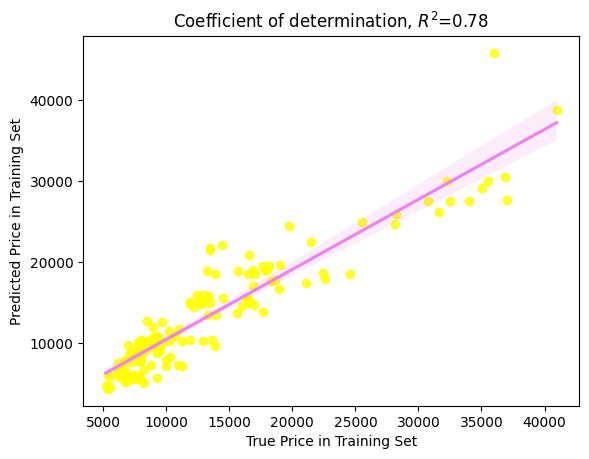

In [20]:
sns.regplot(x=y_train,y=yp_train, color="yellow", line_kws={"color": "violet"})
plt.xlabel('True Price in Training Set')
plt.ylabel('Predicted Price in Training Set')
plt.title('Coefficient of determination, $R^2$=%3.2f' % cv_score_train)


In [21]:
# L1 regularized Lasso Regerssion
model_lasso = Lasso(alpha=2000)
predictor = Pipeline([
    ("Scaling", StandardScaler()),
    ("Lasso", model_lasso)
])

predictor.fit(X_train, y_train)     

yp_train = predictor.predict(X_train) 
yp_test = predictor.predict(X_test) 


cv_score_train = (cross_val_score(predictor,X_train,y_train,cv=5)).mean()
train_score = r2_score(y_train, yp_train)
test_score = r2_score(y_test, yp_test)
rmse_train=rmse(yp_train,y_train)
rmse_test=rmse(yp_test,y_test)

In [22]:
print("cv score of training set:",cv_score_train)
print("r2 score of training set:",train_score)
print("r2 score of testing set:",test_score)
print("rmse of training set:",rmse_train)
print("rmse of testing set:",rmse_test)

cv score of training set: 0.6866753748069792
cv score of testing set: 0.5924763338342025
r2 score of training set: 0.7369143157473846
cv score of testing set: 0.7346590501537213
rmse of training set: 4052.1589881140103
rmse of testing set: 4185.978811589565


Text(0.5, 1.0, 'Coefficient of determination, $R^2$=0.69')

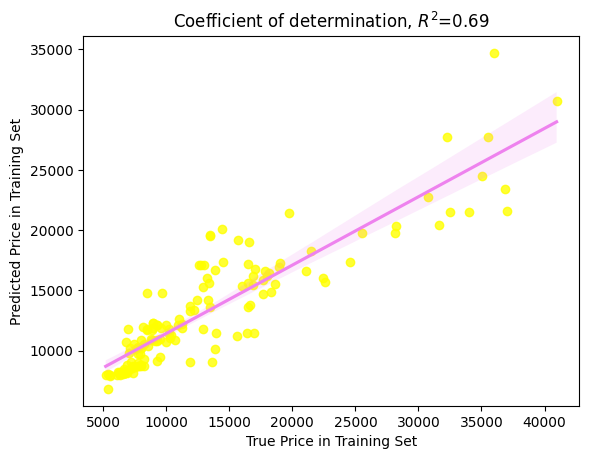

In [23]:
sns.regplot(x=y_train,y=yp_train, color="yellow", line_kws={"color": "violet"})
plt.xlabel('True Price in Training Set')
plt.ylabel('Predicted Price in Training Set')
plt.title('Coefficient of determination, $R^2$=%3.2f' % cv_score_train)

In [24]:
# L2 regularized Ridge Regerssion
model_ridge = Ridge(alpha=200)
predictor = Pipeline([
    ("Scaling", StandardScaler()),
    ("Ridge", model_ridge)
])

predictor.fit(X_train, y_train)     

yp_train = predictor.predict(X_train) 
yp_test = predictor.predict(X_test) 


cv_score_train = (cross_val_score(predictor,X_train,y_train,cv=5)).mean()
train_score = r2_score(y_train, yp_train)
test_score = r2_score(y_test, yp_test)
rmse_train=rmse(yp_train,y_train)
rmse_test=rmse(yp_test,y_test)

In [25]:
print("cv score of training set:",cv_score_train)
print("r2 score of training set:",train_score)
print("r2 score of testing set:",test_score)
print("rmse of training set:",rmse_train)
print("rmse of testing set:",rmse_test)

cv score of training set: 0.6974631249518988
cv score of testing set: 0.6069360524810712
r2 score of training set: 0.7648451615524744
cv score of testing set: 0.7653962846295973
rmse of training set: 3831.0236050122508
rmse of testing set: 3936.0656079600403


Text(0.5, 1.0, 'Coefficient of determination, $R^2$=0.70')

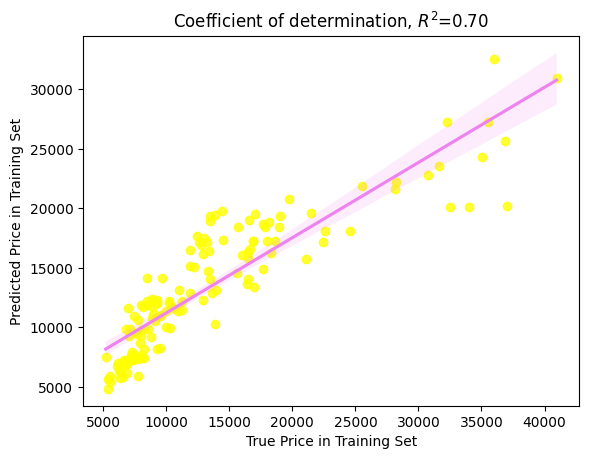

In [26]:
sns.regplot(x=y_train,y=yp_train, color="yellow", line_kws={"color": "violet"})
plt.xlabel('True Price in Training Set')
plt.ylabel('Predicted Price in Training Set')
plt.title('Coefficient of determination, $R^2$=%3.2f' % cv_score_train)

In [27]:
# Elastic net
model_elastic=ElasticNet(alpha=10, l1_ratio=0.9)
predictor = Pipeline([
    ("Scaling", StandardScaler()),
    ("Elastic Net", model_elastic)
])

predictor.fit(X_train, y_train)     

yp_train = predictor.predict(X_train) 
yp_test = predictor.predict(X_test) 


cv_score_train = (cross_val_score(predictor,X_train,y_train,cv=5)).mean()
train_score = r2_score(y_train, yp_train)
test_score = r2_score(y_test, yp_test)
rmse_train=rmse(yp_train,y_train)
rmse_test=rmse(yp_test,y_test)

In [28]:
print("cv score of training set:",cv_score_train)
print("r2 score of training set:",train_score)
print("r2 score of testing set:",test_score)
print("rmse of training set:",rmse_train)
print("rmse of testing set:",rmse_test)

cv score of training set: 0.7343023221670082
cv score of testing set: 0.7039767159888125
r2 score of training set: 0.7874046494759037
cv score of testing set: 0.7842037704867162
rmse of training set: 3642.627395521319
rmse of testing set: 3774.998749488568


Text(0.5, 1.0, 'Coefficient of determination, $R^2$=0.73')

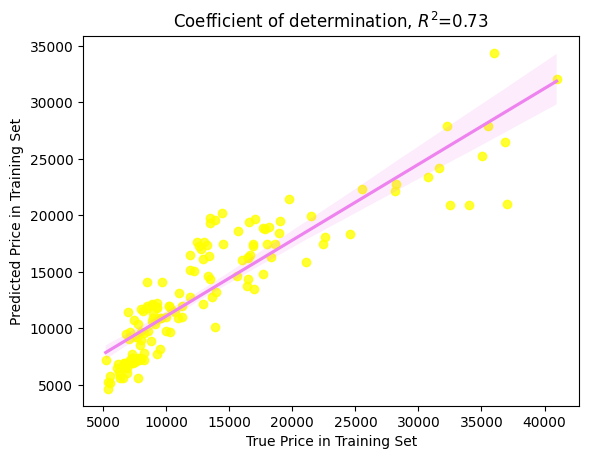

In [29]:
sns.regplot(x=y_train,y=yp_train, color="yellow", line_kws={"color": "violet"})
plt.xlabel('True Price in Training Set')
plt.ylabel('Predicted Price in Training Set')
plt.title('Coefficient of determination, $R^2$=%3.2f' % cv_score_train)

In [37]:
model_RFR = RandomForestRegressor(max_depth=13, min_samples_split=2, n_estimators=13)

model_RFR.fit(X_train,y_train)
yp_train=model_RFR.predict(X_train)
yp_test = model_RFR.predict(X_test) 


cv_score_train = (cross_val_score(model_RFR,X_train,y_train,cv=5)).mean()
train_score = r2_score(y_train, yp_train)
test_score = r2_score(y_test, yp_test)
rmse_train=rmse(yp_train,y_train)
rmse_test=rmse(yp_test,y_test)

In [53]:
print("cv score of training set:",cv_score_train)
print("r2 score of training set:",train_score)
print("r2 score of testing set:",test_score)
print("rmse of training set:",rmse_train)
print("rmse of testing set:",rmse_test)

cv score of training set: 0.8673954649735611
r2 score of training set: 0.9680568169220974
r2 score of testing set: 0.8775419743077438
rmse of training set: 1411.9748582203447
rmse of testing set: 2843.7310020590426


Text(0.5, 1.0, 'Coefficient of determination, $R^2$=0.89')

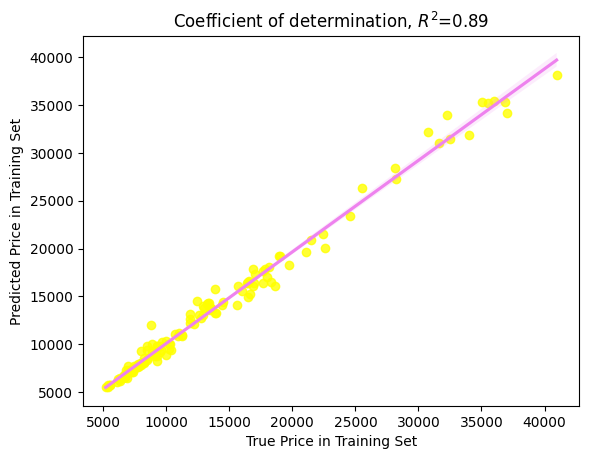

In [39]:
sns.regplot(x=y_train,y=yp_train, color="yellow", line_kws={"color": "violet"})
plt.xlabel('True Price in Training Set')
plt.ylabel('Predicted Price in Training Set')
plt.title('Coefficient of determination, $R^2$=%3.2f' % cv_score_train)

In [43]:
#Extratrees Regressor
model_ETR = ExtraTreesRegressor(max_depth=20, min_samples_split=4, n_estimators=26)

model_ETR.fit(X_train, y_train)

yp_train= model_ETR.predict(X_train)
yp_test = model_ETR.predict(X_test) 


cv_score_train = (cross_val_score(model_ETR,X_train,y_train,cv=5)).mean()
train_score = r2_score(y_train, yp_train)
test_score = r2_score(y_test, yp_test)
rmse_train=rmse(yp_train,y_train)
rmse_test=rmse(yp_test,y_test)

In [45]:
print("cv score of training set:",cv_score_train)
print("r2 score of training set:",train_score)
print("r2 score of testing set:",test_score)
print("rmse of training set:",rmse_train)
print("rmse of testing set:",rmse_test)

cv score of training set: 0.902848548917011
r2 score of training set: 0.9946028934266495
r2 score of testing set: 0.9247407673645921
rmse of training set: 580.3879209965398
rmse of testing set: 2229.3321484946755


Text(0.5, 1.0, 'Coefficient of determination, $R^2$=0.90')

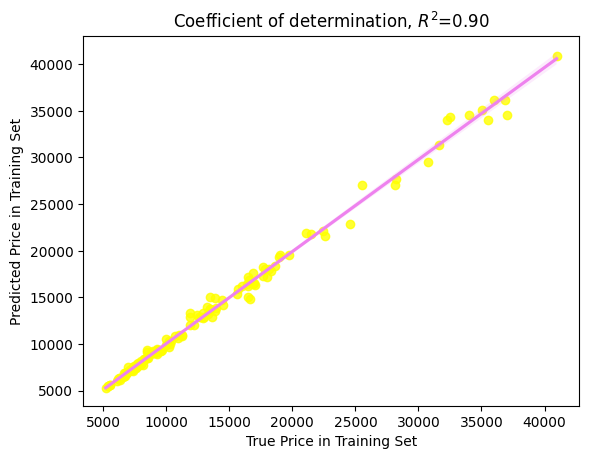

In [46]:
sns.regplot(x=y_train,y=yp_train, color="yellow", line_kws={"color": "violet"})
plt.xlabel('True Price in Training Set')
plt.ylabel('Predicted Price in Training Set')
plt.title('Coefficient of determination, $R^2$=%3.2f' % cv_score_train)

In [50]:
#Gradiant Boost Tree Regressor
model_GBR = GradientBoostingRegressor(n_estimators=7, learning_rate=1, max_depth=2, random_state=0)

model_GBR.fit(X_train, y_train)

yp_train=model_GBR.predict(X_train)
yp_test = model_GBR.predict(X_test) 

cv_score_train = (cross_val_score(model_GBR,X_train,y_train,cv=5)).mean()
train_score = r2_score(y_train, yp_train)
test_score = r2_score(y_test, yp_test)
rmse_train=rmse(yp_train,y_train)
rmse_test=rmse(yp_test,y_test)

In [51]:
print("cv score of training set:",cv_score_train)
print("r2 score of training set:",train_score)
print("r2 score of testing set:",test_score)
print("rmse of training set:",rmse_train)
print("rmse of testing set:",rmse_test)

cv score of training set: 0.8673954649735611
r2 score of training set: 0.9680568169220974
r2 score of testing set: 0.8775419743077438
rmse of training set: 1411.9748582203447
rmse of testing set: 2843.7310020590426


Text(0.5, 1.0, 'Coefficient of determination, $R^2$=0.87')

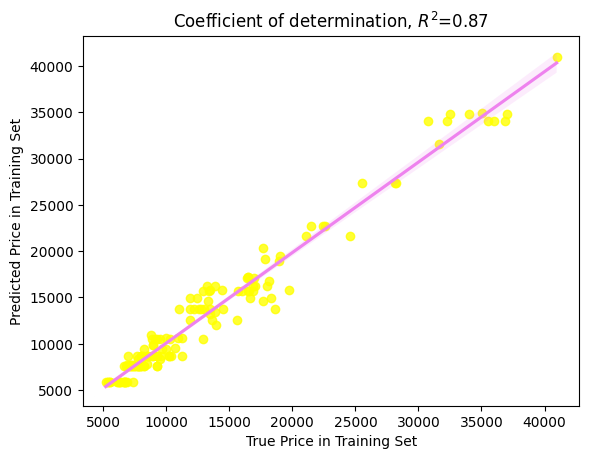

In [52]:
sns.regplot(x=y_train,y=yp_train, color="yellow", line_kws={"color": "violet"})
plt.xlabel('True Price in Training Set')
plt.ylabel('Predicted Price in Training Set')
plt.title('Coefficient of determination, $R^2$=%3.2f' % cv_score_train)

[0.01978052 0.00340937 0.02035745 0.02647225 0.10317255 0.00495491
 0.27755853 0.23990365 0.011906   0.01111137 0.01230724 0.14045856
 0.02018542 0.05897284 0.04944936]


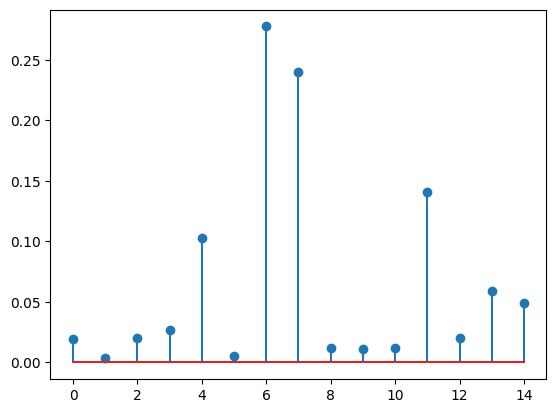

In [54]:
#Extratrees is the best model so measuring the feature importances
importances = model_ETR.feature_importances_

print(importances)

plt.stem(importances)
plt.show()


In [56]:
# Select four most important features

selected=model_ETR.feature_importances_.argsort()[-1:-5:-1]
for feature in selected:
    print(feature, data_num.columns[feature])


6 curbweight
7 enginesize
11 horsepower
4 carwidth


/tmp/ipykernel_168/19120146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_con.corr() , annot=True, cmap="BuPu")


<AxesSubplot: >

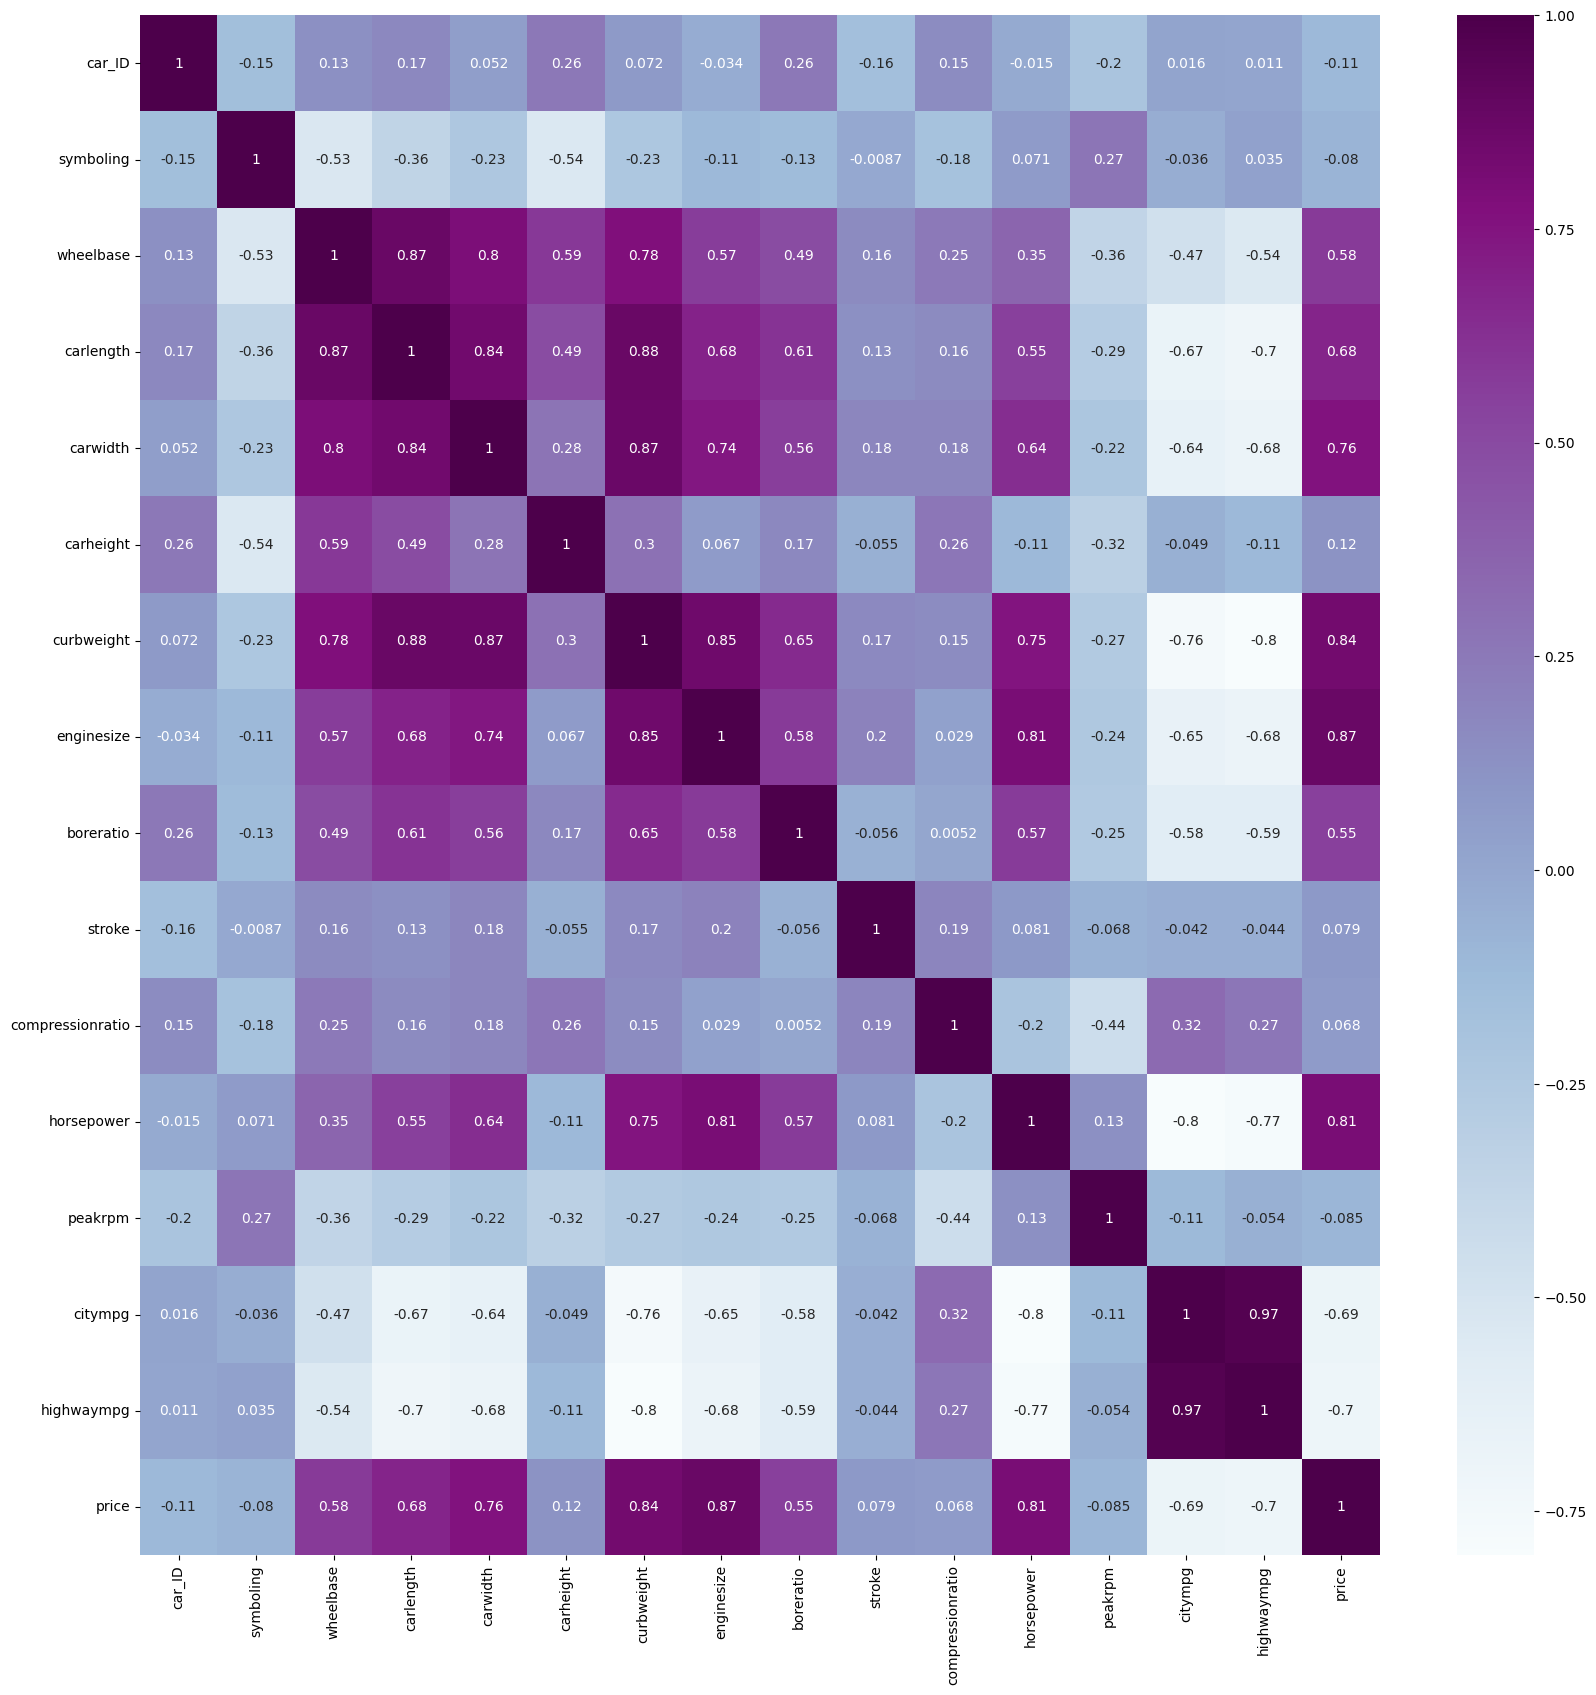

In [45]:
#Correlation of all features with price
plt.figure(figsize=(20,20))
sns.heatmap(data_con.corr() , annot=True, cmap="BuPu")

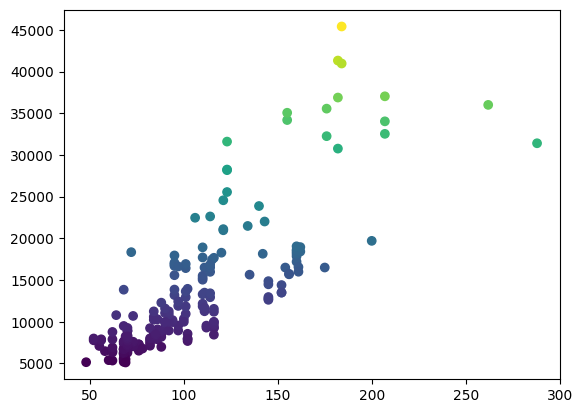

In [69]:
plt.scatter(X["horsepower"], y, c=data_num.price)

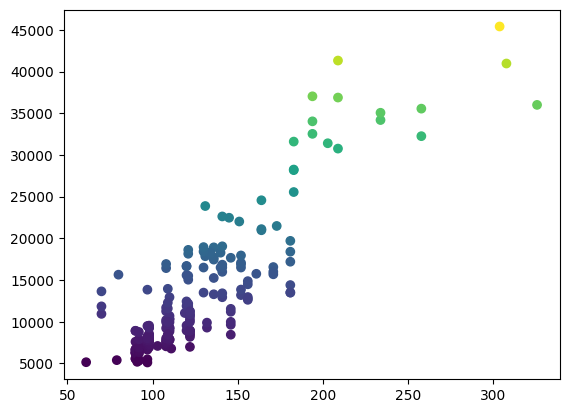

In [70]:
plt.scatter(X["enginesize"], y, c=data_num.price)

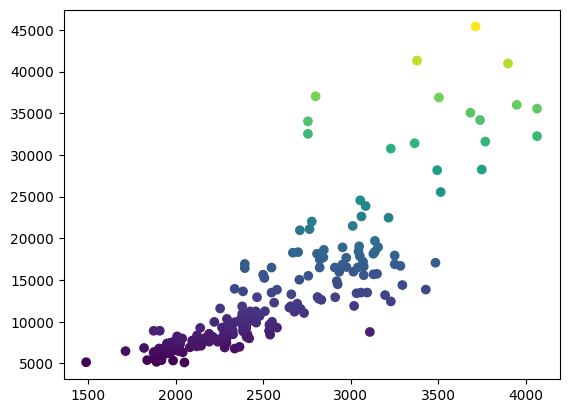

In [71]:
plt.scatter(X["curbweight"], y, c=data_num.price)

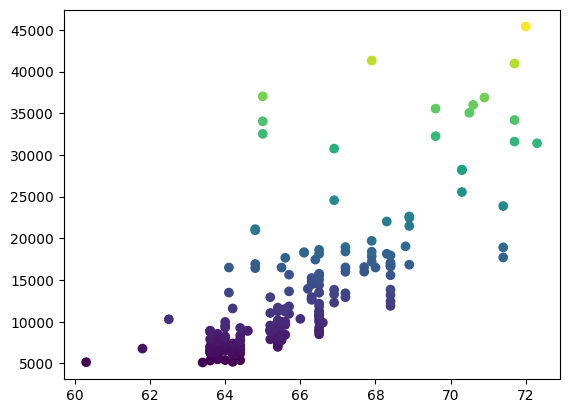

In [72]:
plt.scatter(X["carwidth"], y, c=data_num.price)

In [57]:
# Now modelling design matrix using the top 4 features only
X=data_num[["horsepower","enginesize","carwidth","curbweight"]].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 0)

In [58]:
#Extratrees Regressor using top 4 important features
model_ETR = ExtraTreesRegressor(max_depth=20, min_samples_split=4, n_estimators=26)

model_ETR.fit(X_train, y_train)

yp_train= model_ETR.predict(X_train)
yp_test = model_ETR.predict(X_test) 


cv_score_train = (cross_val_score(model_ETR,X_train,y_train,cv=5)).mean()
train_score = r2_score(y_train, yp_train)
test_score = r2_score(y_test, yp_test)
rmse_train=rmse(yp_train,y_train)
rmse_test=rmse(yp_test,y_test)

In [59]:
print("cv score of training set:",cv_score_train)
print("r2 score of training set:",train_score)
print("r2 score of testing set:",test_score)
print("rmse of training set:",rmse_train)
print("rmse of testing set:",rmse_test)

cv score of training set: 0.9026831195416964
r2 score of training set: 0.9913166531688082
r2 score of testing set: 0.9082640524702335
rmse of training set: 736.1756397051191
rmse of testing set: 2461.30062248461


Text(0.5, 1.0, 'Coefficient of determination, $R^2$=0.90')

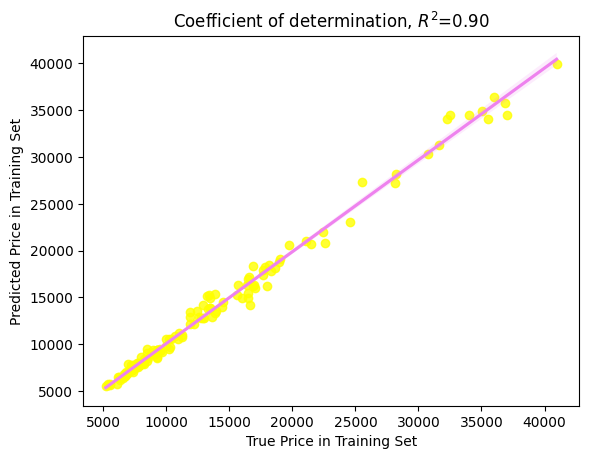

In [60]:
sns.regplot(x=y_train,y=yp_train, color="yellow", line_kws={"color": "violet"})
plt.xlabel('True Price in Training Set')
plt.ylabel('Predicted Price in Training Set')
plt.title('Coefficient of determination, $R^2$=%3.2f' % cv_score_train)

<function matplotlib.pyplot.show(close=None, block=None)>

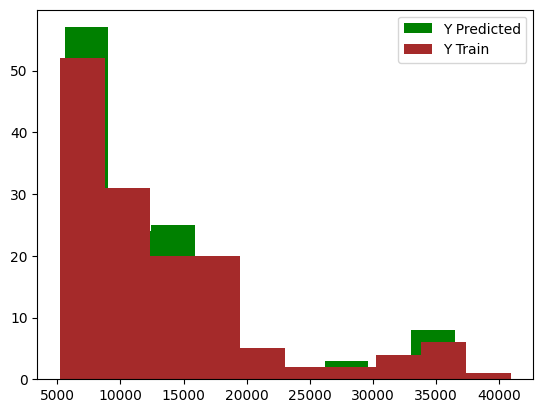

In [66]:
plt.hist(yp_train,label='Y Predicted',color="green")
plt.hist(y_train,label='Y Train',color="brown")
plt.legend(loc='upper right')
plt.show